<a href="https://colab.research.google.com/github/remcovanwijk040/AI/blob/main/spaceship_titanic_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship titanic competition

# Question and problem definition

Data description:

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



## Workflow goals
The data science solutions workflow solves for seven major goals.

**Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating**. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting**. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals.

## Import libraries

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import data

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/remcovanwijk040/AI/main/kaggle/spaceship_titanic/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/remcovanwijk040/AI/main/kaggle/spaceship_titanic/test.csv')
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()
combine = [train_df, test_df]

# EDA

### Available features

In [ ]:
#Which features are available in the dataset
print(train_df.columns.values)

['passengerid' 'homeplanet' 'cryosleep' 'cabin' 'destination' 'age' 'vip'
 'roomservice' 'foodcourt' 'shoppingmall' 'spa' 'vrdeck' 'name']


### Preview the data

In [ ]:
# preview the data
train_df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez




*   **Which features are categorical**: HomePlanet, CryoSleep, destination, vip, name
*   **Which features are numerical**: age, roomservice, foodcourt, shoppingmall, spa, vrdeck
*   **Which are mixed types**: cabin, passengerid




### Errors and typos
Which features may contain errors or typos

In [ ]:
train_df.tail()

# Watch for age, cabin and destination

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


### Missing values

In [ ]:
print('Train_df')
print(train_df.isna().sum())
print('_'*40)
print('Test_df')
print(test_df.isna().sum())

Train_df
passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age             179
vip             203
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
name            200
transported       0
dtype: int64
________________________________________
Test_df
passengerid       0
homeplanet       87
cryosleep        93
cabin           100
destination      92
age              91
vip              93
roomservice      82
foodcourt       106
shoppingmall     98
spa             101
vrdeck           80
name             94
dtype: int64


### Distribution of features

In [ ]:
#Numerical
train_df.describe()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_df.describe(include=['O'])

,passengerid,homeplanet,cryosleep,cabin,destination,vip,name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


### Analyse features

#### Pivoting features
We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical, ordinal, or discrete type.

*   homeplanet
*   cryosleep
*   destination
*   vip




In [ ]:
features = ['homeplanet', 'cryosleep', 'destination', 'vip']

for x in features:
  print(train_df[[x, 'transported']].groupby([x], as_index=False).mean().sort_values(by='transported', ascending=False))
  print('-'*40)

  homeplanet  transported
1     Europa     0.658846
2       Mars     0.523024
0      Earth     0.423946
----------------------------------------
   cryosleep  transported
1       True     0.817583
0      False     0.328921
----------------------------------------
     destination  transported
0    55 Cancri e     0.610000
1  PSO J318.5-22     0.503769
2    TRAPPIST-1e     0.471175
----------------------------------------
     vip  transported
0  False     0.506332
1   True     0.381910
----------------------------------------


#### Visualise features

<Figure size 640x480 with 0 Axes>

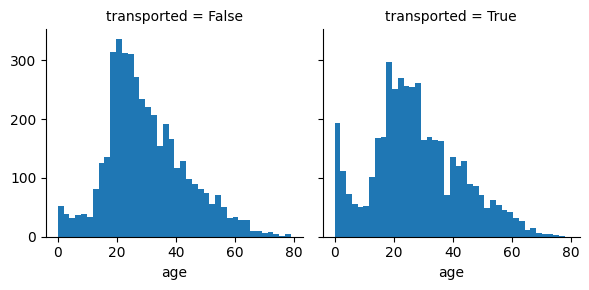

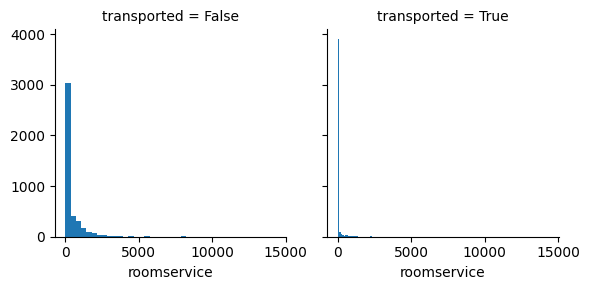

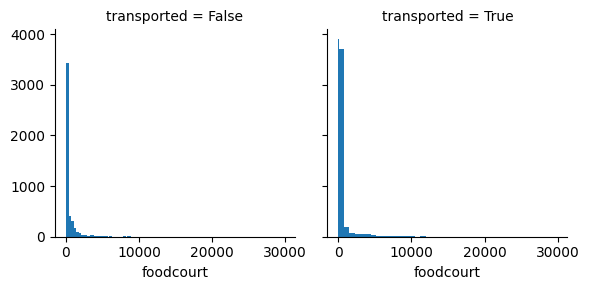

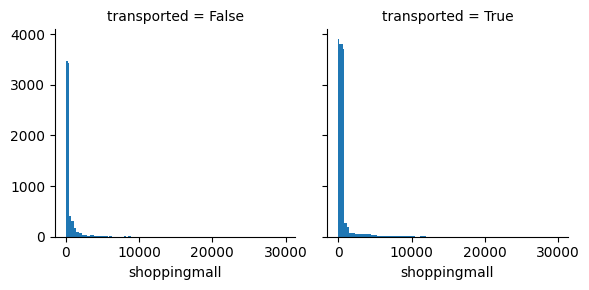

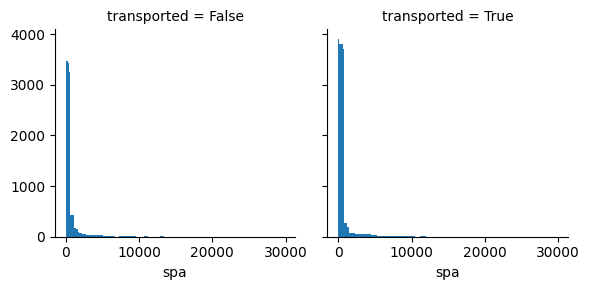

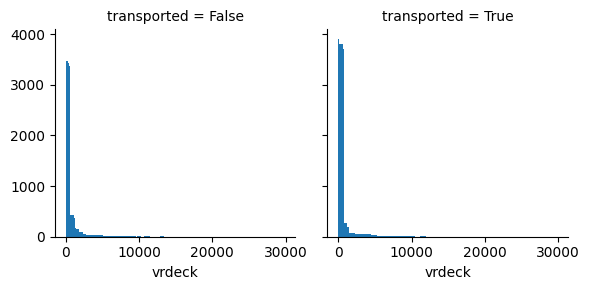

In [ ]:
g = sns.FacetGrid(train_df, col='transported')
list =  ['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']

for x in list:
  plt.figure()
  g.map(plt.hist, x, bins=40)
  plt.show()

# For age seems to be a clear tendency that the youngest (<20) have higher chance to be transported

# There also seems to be a tendency that those who have spend more seem to be more likely to be transported


#### Correlating numerical and ordinal features

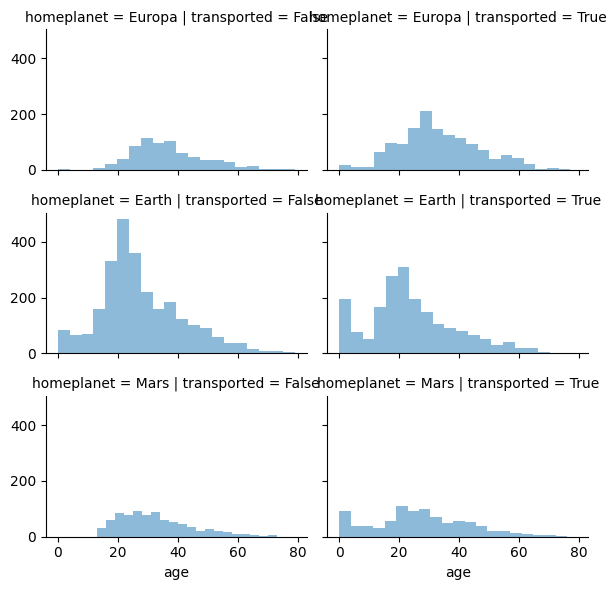

In [ ]:
# Homeplanet x age

#grid = sns.FacetGrid(train_df, col='vip', hue='transported')
grid = sns.FacetGrid(train_df, col='transported', row='homeplanet', aspect=1.5, height=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

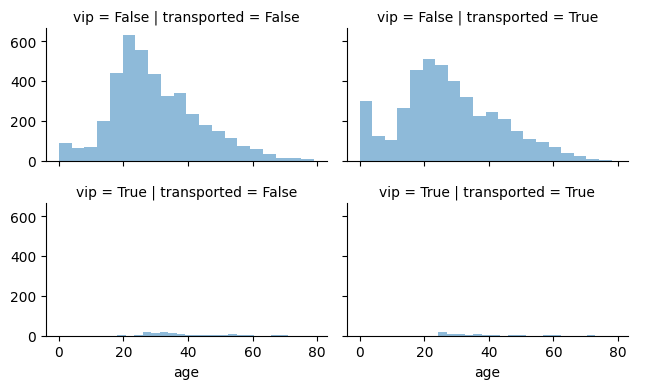

In [ ]:
# Vip x age
#grid = sns.FacetGrid(train_df, col='vip', hue='transported')
grid = sns.FacetGrid(train_df, col='transported', row='vip', aspect=1.6, height=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

#### Correlating categorical features

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


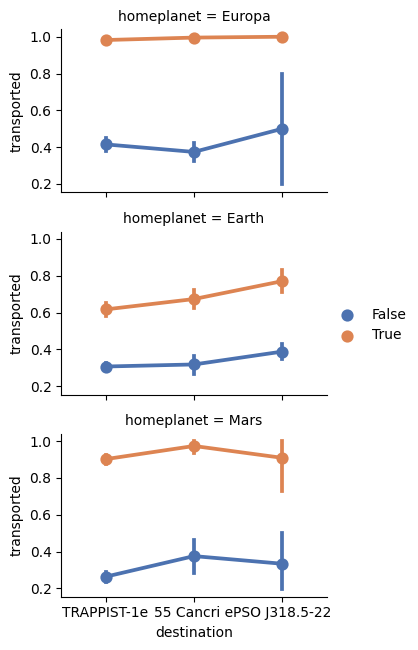

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='homeplanet', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'destination', 'transported', 'cryosleep', palette='deep')
grid.add_legend()

#### Correlating categorical and numerical features

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

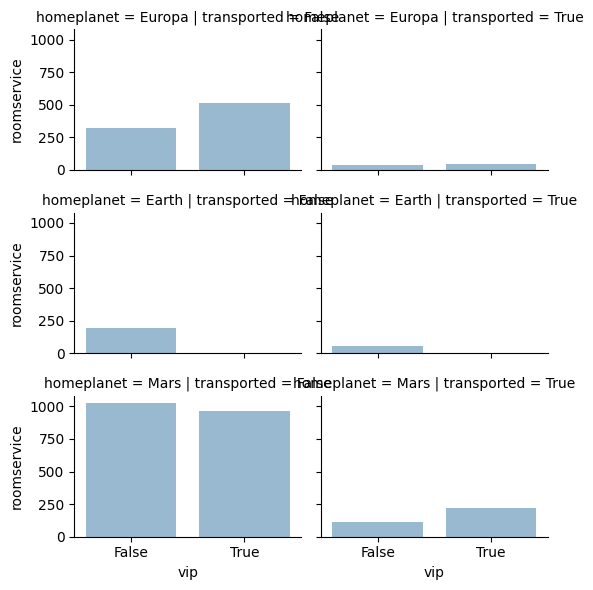

In [ ]:
# grid = sns.FacetGrid(train_df, col='homeplanet', hue='transported', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='homeplanet', col='transported', height=2, aspect=1.4)
grid.map(sns.barplot, 'vip', 'roomservice', alpha=.5, ci=None)
grid.add_legend()

# Data wrangling

## Drop features

In [ ]:
#For this analysis we do not need to drop any features yet. All seem to matter from this point on

#print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
#
#train_df = train_df.drop(['vip', 'homeplanet'], axis=1)
#test_df = test_df.drop(['vip', 'homeplanet'], axis=1)
#combine = [train_df, test_df]
#
#"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

## Creating new features from existing ones

**Passengerid**
passenger id hold information about the family and the number of family members. let's split this

In [ ]:
list = train_df["passengerid"].str.split("_", n = 1, expand = True)
train_df['passenger_group'] = list[0]
train_df['passenger_member'] = list[1]

train_df['group_size'] = train_df['passenger_group'].map(train_df.groupby(['passenger_group'])['passenger_group'].count())
train_df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group,passenger_member,family_size,group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,NaN,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,NaN,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,NaN,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,NaN,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,NaN,1


# Modeling

# Model Evaluation